# 02-02. 데이터 전처리

## numpy로 input과 target을 만드는 조금 더 세련된 방법
- np.column_stack(): 튜플의 형태로 리스트를 전달받아 각 리스트를 일렬로 세워 나란히 연결
- np.ones(), np.zeros(): 각각 원하는 개수의 1, 0으로 채워진 리스트 생성
- np.concatenate(): 튜플로 주어진 배열을 단순 연결

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np

fish_data = np.column_stack((fish_length, fish_weight))  # np.column_stack을 사용해 input 데이터 생성
print(fish_data[:5])  # 처음 5개의 데이터를 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [2]:
print(np.ones(5))  #원하는 개수만큼의 1이 채워진 리스트가 생성된다.

[1. 1. 1. 1. 1.]


In [3]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))  # np.concatenate()를 사용해 target 데이터 생성
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런을 사용해 train set와 test set를 나누는 조금 더 세련된 방법
- train_test_split(): 전달되는 리스트나 배열을 비율에 맞게 train set와 test set로 나눠주는 함수
  - 사이킷런의 model_selection 모듈에 위치
  - test set으로 떼어내는 함수는 default: 25%로 설정

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)  # 두 개의 배열을 전달해 총 4개의 배열을 반환

print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [5]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


- 실제 생선 데이터의 비율(2.5:1)과 test set의 비율(3.3:1)의 차이가 발생(샘플링 편향)   
→ train_test_split()의 stratify 매개변수에 target 데이터를 전달하여 해결

In [6]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)  #stratify에 target 데이터를 전달 시 클래스 비율에 맞게 데이터를 분배함

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 모델의 문제점 파악하기

In [7]:
# 모델 생성
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(test_input, test_target))

1.0


In [8]:
# 도미 샘플 입력
print(kn.predict([[25, 150]]))

[0.]


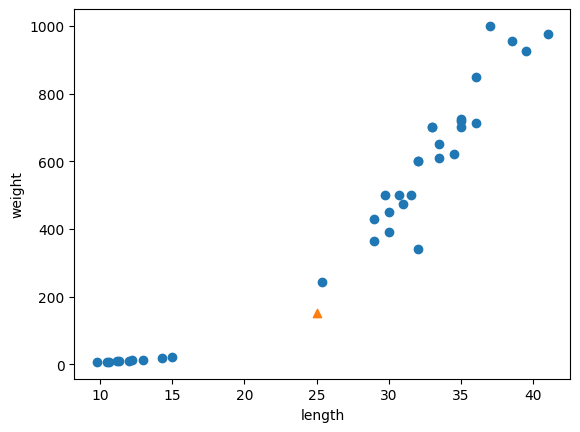

In [9]:
# 문제가 되는 샘플의 그래프 상 위치 파악
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')  # marker는 데이터의 모양 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
# kn 클래스가 판단한 이웃 샘플 탐색
distances, indexes = kn.kneighbors([[25, 150]])  # kneighbors() 함수는 이웃 샘플들의 거리와 인덱스를 배열로 반환
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


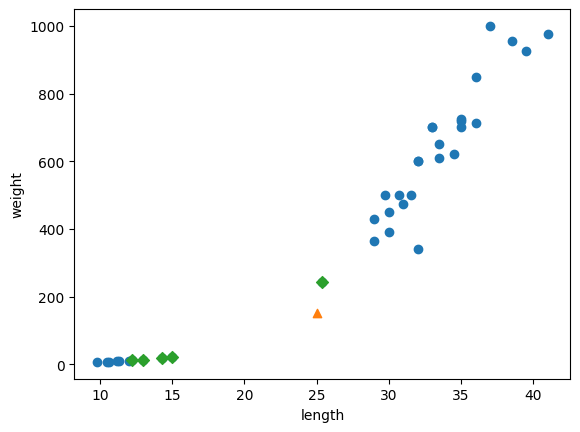

In [11]:
# 이웃 샘플을 따로 표시한 산점도 생성
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')  # D를 지정하면 마름모 모양
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [12]:
# 그래프 상으로 도미와 더 가깝게 보임에도 빙어 샘플 4개가 이웃 샘플로 처리됨
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [13]:
# 이웃 샘플까지의 거리
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


- x축의 범위(1\~40)와 y축의 범위(0\~1000)의 차이 때문에 y축의 차이가 매우 크게 계산됨

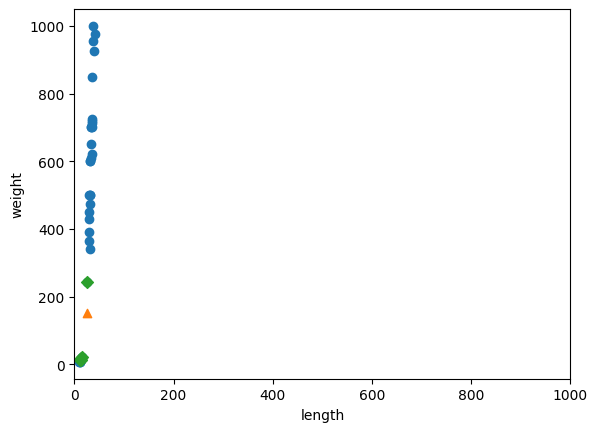

In [14]:
# x축의 범위를 y축과 동일하게 맞춰본다면?
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0,1000))  # xlim()으로 x축의 범위를 조절(y축은 ylim()으로)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이가 판단에 거의 영향을 미치지 못하게 됨

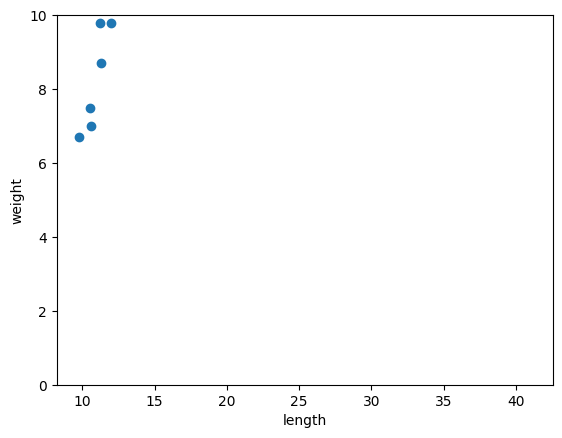

In [15]:
# y축의 범위를 x축과 동일하게 맞춰본다면?
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.ylim((0,10))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

대부분의 샘플이 그래프 밖으로 벗어나게 됨

### 문제가 발생하는 이유
- 두 특성의 값이 놓인 범위, 즉 스케일(scale)이 다르기 때문
- 데이터 전처리(data preprocessing): 특성값을 일정한 기준에 맞춰 조정하는 것
  - 표준점수(standard score): 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타내는 점수   
  가장 널리 사용되는 전처리 방법

In [16]:
# 표준점수를 개산하는 방법 표준점수를 개산하는 방법
# 평균을 빼고 표준편차로 나누기

mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [20]:
# 원본 데이터를 표준점수로 변환
train_scaled = (train_input - mean) / std  # 넘파이에서는 모든 행에서 이 같은 연산을 수행하는 브로드캐스팅(broadcasting) 기능을 지원

## 전처리 데이터로 모델 훈련하기

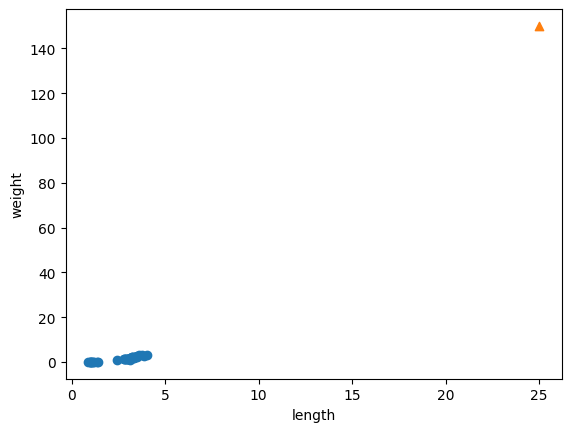

In [21]:
# 전처리 데이터를 사용해 산점도 생성
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 샘플만 원본 데이터라 발생하는 문제   
→ 샘플도 동일하게 처리

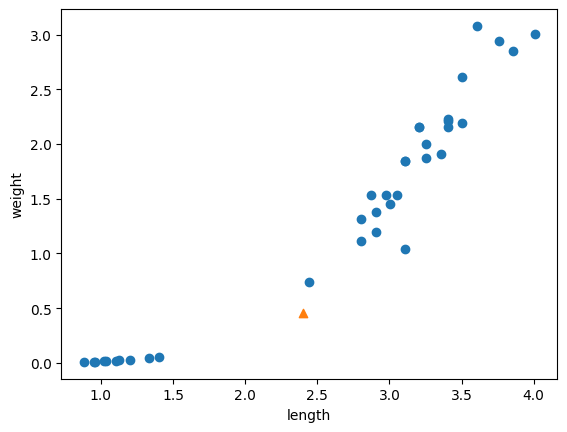

In [22]:
new = ([25, 150] - mean) / std  # 표준점수로 변환

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
# 새로운 데이터셋으로 모델을 다시 훈련
kn.fit(train_scaled, train_target)

# test set 표준점수로 변환
# 이 때 train set의 mean값과 std값을 사용해야 동일한 스케일로 계산할 수 있음
test_scaled = (test_input - mean) / std

# 모델 평가
print(kn.score(test_scaled, test_target))

1.0


In [24]:
# 샘플 데이터 예측
print(kn.predict([new]))

[1.]


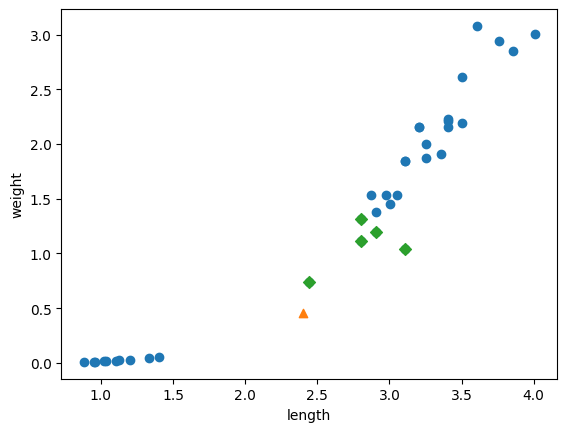

In [25]:
# 이웃 샘플 확인
distances, indexes = kn.kneighbors([new])

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 추가학습
1. numpy의 axis
- default: 모든 값을 계산
- axis = 0: 열 방향(여기서는 각 특성별) 계산
- axis = 1: 행 방향 계산


In [30]:
arr1 = np.arange(6).reshape(2, 3)
print(arr1)

mean = np.mean(arr1)
print(mean)

[[0 1 2]
 [3 4 5]]
2.5


In [31]:
mean = np.mean(arr1, axis=0)
print(mean)

[1.5 2.5 3.5]


In [32]:
mean = np.mean(arr1, axis=1)
print(mean)

[1. 4.]


### 배열이 3차원일 때는?

- 0번 축은 채널(행렬의 개수)가 됨
- axis = 0: 각 채널의 같은 원소끼리 계산
- axis = 1: 각 채널의 열끼리 계산
- axis = 2: 각 채널의 행끼리 계산
- axis = (1, 2): 각 채널끼리 계산

In [37]:
arr2 = np.arange(24).reshape(2, 3, 4)
print(arr2)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [38]:
mean = np.mean(arr2, axis=0)
print(mean)

[[ 6.  7.  8.  9.]
 [10. 11. 12. 13.]
 [14. 15. 16. 17.]]


In [39]:
mean = np.mean(arr2, axis=1)
print(mean)

[[ 4.  5.  6.  7.]
 [16. 17. 18. 19.]]


In [40]:
mean = np.mean(arr2, axis=2)
print(mean)

[[ 1.5  5.5  9.5]
 [13.5 17.5 21.5]]


In [41]:
mean = np.mean(arr2, axis=(1, 2))
print(mean)

[ 5.5 17.5]
